In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

#### Ovo su vežbe od 17/12/2025. 
### Vežba 04: Upoznavanje sa modelom atmosfere Sunca i numeričko rešavanje JPZ

Cilj ove vežbe je da: 
1) Upoznati se sa jednim modelom atmosfere Sunca 
2) Izračunati zavisnost $B_\nu$ od dubine za različite talasne dužine u vidljivom, i bliskom UV i IR delu spektra
3) Rešiti jednačinu prenosa zračenja za jedno S i $\tau$

3.1) Rešiti JPZ za fiksno tau i različite Slambda da dobijemo izlazni spektar. Diskutovati

3.2) Ponoviti ovo sa ad-hoc tau zavisnim od talasne dužine.

3.3) Isto to, ali fiksno lambda a menjamo izlasno mi

### 1) Atmosfera Sunca 
Učitajte numpy fajl falc_71.dat i iz njega pročitajte prvih 5 kolona, to su (voditi računa da indeksiranje u pajtonu ide od 0): 
1) Optička dubina u kontinuumu (log skala)
2) Visina u cm
3) Temperatura u K 
4) Pritisak gasa u dyn/cm^2
5) Pritisak elektrona u dyn/cm^2

Vodite računa da, po nekoj tradiciji, modeli atmosfera počinju *odozgo*, tj. sortirani su po optičkoj dubini

In [3]:
atmos = np.loadtxt('falc_71.dat', unpack=True, skiprows=1)
atmos.shape

(12, 71)

In [5]:
# Hajde da ovde damo imena nasim promenljivim. Necemo ih konvertovati, neka ostanu u konzistentnim jedinicama. 
tau = 10.**atmos[0]  # opticka dubina na nekoj referentnoj talasnoj duzini
z = atmos[1]      # visina u cm 
T = atmos[2]      # temperatura u K
pg = atmos[3]     # gasni pritisak u dyn/cm^2
pe = atmos[4]     # elektronski pritisak u dyn/cm^2 

#### Sledeći korak, vizualizujemo neke od ovih veličina, diskutujemo usmeno njihove distribucije i konvertujemo šta nam bude potrebno. 

Text(0.5, 1.0, 'Temperatura atmosfere FALC-71 kao funkcija visine')

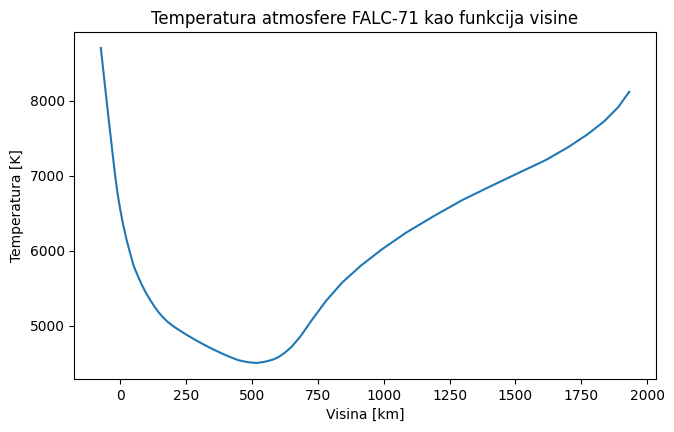

In [30]:
# Najprirodnije je da krenemo od plotovanja temperature kao funkcije visine, pa onda kao funckije opticke dubine: 
plt.figure(figsize=(7.5,4.5))
plt.plot(z/1e5, T)
plt.xlabel('Visina [km]')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura atmosfere FALC-71 kao funkcija visine')

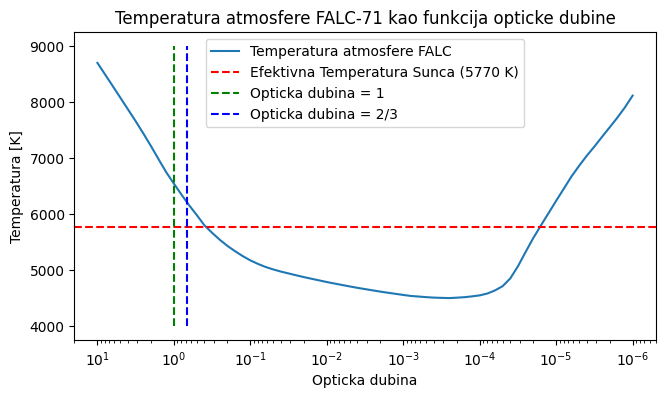

In [ ]:
# Dodajmo isti ovakav plot, samo sada koristimo opticku dubinu kao x osu:
plt.figure(figsize=(7.5,4.5))
plt.semilogx(tau, T, label='Temperatura atmosfere FALC')
plt.hlines(5770, xmin=0.5e-6, xmax=20, colors='r', linestyles='dashed', label='Efektivna Temperatura Sunca (5770 K)')
plt.vlines(1, ymin=4000, ymax=9000, colors='g', linestyles='dashed', label='Opticka dubina = 1')
plt.vlines(2./3., ymin=4000, ymax=9000, colors='b', linestyles='dashed', label='Opticka dubina = 2/3')
plt.xlabel('Opticka dubina')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura atmosfere FALC-71 kao funkcija opticke dubine')  
plt.xlim([20, 0.5e-6])
plt.legend()

# Obratite paznju da je skala x ose logaritamska i obrnuta

Text(0.5, 1.0, 'Opticka dubina kao funkcija visine u atmosferi FALC-71')

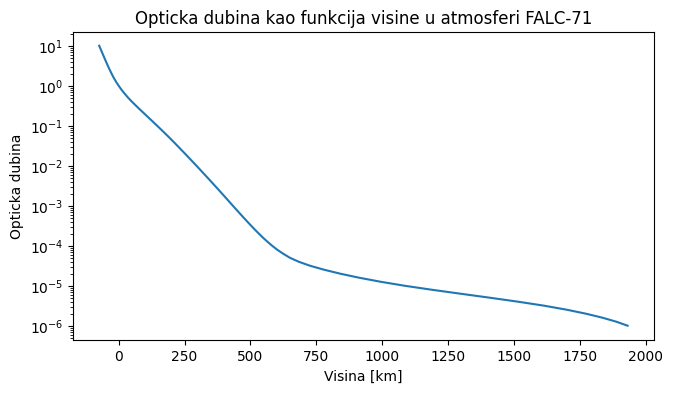

In [ ]:
# Sledeci korak, analizirajmo relaciju izmedju visine i opticke dubine.
plt.figure(figsize=(7.5,4.5))
plt.semilogy(z/1e5, tau)
plt.xlabel('Visina [km]')
plt.ylabel('Opticka dubina')
plt.title('Opticka dubina kao funkcija visine u atmosferi FALC-71')

Text(0.5, 1.0, 'Pritisak gasa kao funkcija visine u atmosferi FALC')

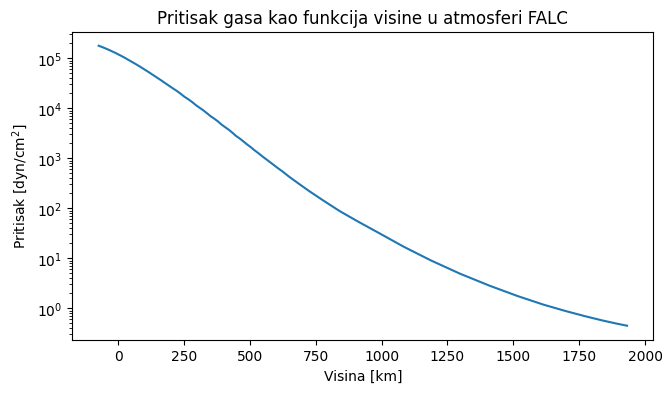

In [ ]:
# Sledeci korak, analizirajmo pritisak gasa kao funkciju visine: 
plt.figure(figsize=(7.5,4.5))
plt.semilogy(z/1e5, pg, label='Gasni pritisak')
plt.xlabel('Visina [km]')
plt.ylabel('Pritisak [dyn/cm$^2$]')
plt.title('Pritisak gasa kao funkcija visine u atmosferi FALC')

In [27]:
# Hajde da sa ovog grafika odredimo skalu visine: 
# Izveli smo na tabli da ln (p1/p2) = (h2 - h1)/H, gde je H skala visine.
# Odredimo sada H sa prve i poslednje tacke: 
H = ( (z[-1]-z[0]) ) / np.log(pg[0]/pg[-1])
print(f'Skala visine H = {H/1e5:.2f} km')

Skala visine H = 155.59 km


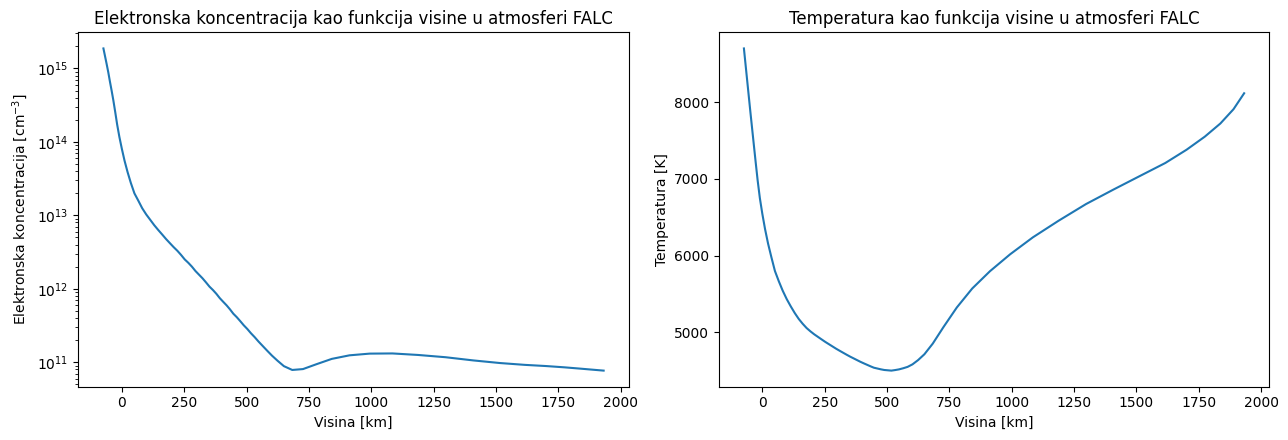

In [33]:
# Sledeci korak je da analiziramo elektronski pritisak kao funkciju visine, s tim sto smo mi vec navikli na 
# elektronsku koncentraciju, pa cemo izvrsiti tu konverziju: 
ne = pe / (1.38e-16 * T)  # elektronska koncentracija u cm^-3

plt.figure(figsize=(13,4.5))
plt.subplot(121)
plt.semilogy(z/1e5, ne, label='Elektronska koncentracija')
plt.xlabel('Visina [km]')
plt.ylabel('Elektronska koncentracija [cm$^{-3}$]')
plt.title('Elektronska koncentracija kao funkcija visine u atmosferi FALC')
plt.subplot(122)
# Pored plotujemo temperaturu
plt.plot(z/1e5, T, label='Temperatura')
plt.xlabel('Visina [km]')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura kao funkcija visine u atmosferi FALC')
plt.tight_layout()

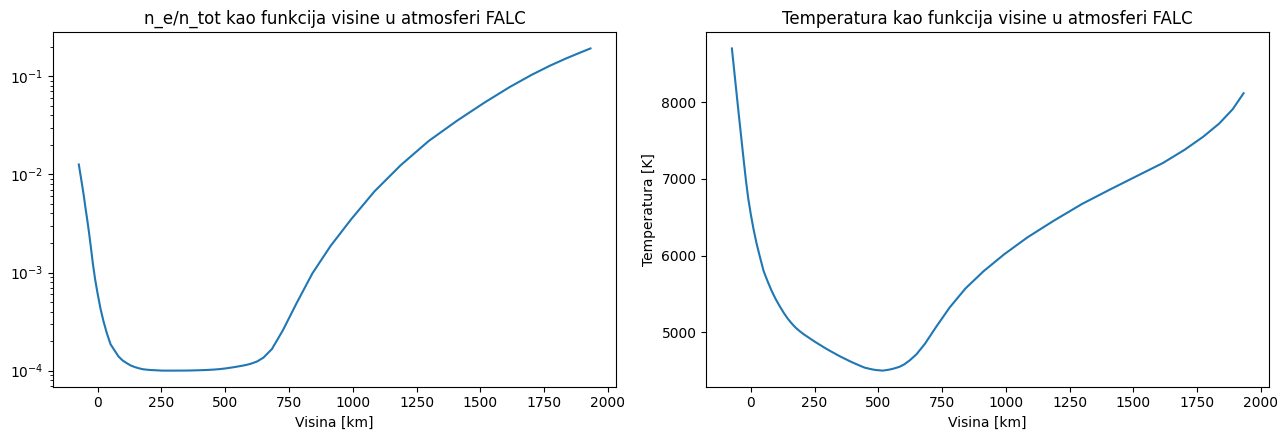

In [36]:
# Zasto ovaj loklni maksimum u elektronskoj koncentraciji na oko 500 km visine? 
# Da pokusamo da nadjemo odgovor, racunamo udeo elektronske koncentracije u ukupnoj koncentraciji svih cestica:
n_total = pg / (1.38e-16 * T)  # ukupna koncentracija cestica u cm^-3
fraction_e = ne / n_total 

plt.figure(figsize=(13,4.5))
plt.subplot(121)
plt.semilogy(z/1e5, fraction_e, label='Udeo elektronske koncentracije')
plt.xlabel('Visina [km]')
#plt.ylabel('Elektronska koncentracija [cm$^{-3}$]')
plt.title('n_e/n_tot kao funkcija visine u atmosferi FALC')
plt.subplot(122)
# Pored plotujemo temperaturu
plt.plot(z/1e5, T, label='Temperatura')
plt.xlabel('Visina [km]')
plt.ylabel('Temperatura [K]')
plt.title('Temperatura kao funkcija visine u atmosferi FALC')
plt.tight_layout()

#### Sada želimo da izračunamo kako Plankova funkcija (koju ćemo kasnije uzeti za funkciju izvora) zavisi od visine, za različite talasne dužine. 

Odaberite skalu talasnih dužina, i izračunajte $B_\nu$ u zavisnosti od visine i talasne dužine (možemo, u principu, da koristimo i $B_\lambda$)

In [70]:
llambda = np.linspace(50,2500,50) * 1e-9 # ovo je u nm pa cemo odmah da pretvorimo u m 
#print (llambda)

In [39]:
def B_nu(T, llambda):
    """Funkcija koja racuna Planckovu funkciju B_nu(T) u SI jedinicama (W/m^2/sr/Hz)
    za temperaturu T u K i talasnu duzinu m."""
    h = 6.626e-34  # Plankova konstanta u J*s
    k_B = 1.38e-23 # Bolcmanova konstanta u J/K
    c = 3e8        # brzina svetlosti u m/s

    nu = c / llambda  # frekvencija u Hz
    
    B = (2*h*nu**3) / (c**2) * 1 / (np.exp(h*nu/(k_B*T)) - 1)
    return B

In [71]:
# Hajde samo da probamo da li radi:
# print(B_nu(5770, 500e-9))  # Planckova funkcija za T=5770K i lambda=500nm

# Izgleda da radi, izracunajmo sada Plankovu funkciju svuda u atmosferi za sve talasne duzine:
B_nu_atmos = B_nu(T[:,None], llambda[None,:]) 
B_nu_atmos.shape

(71, 50)

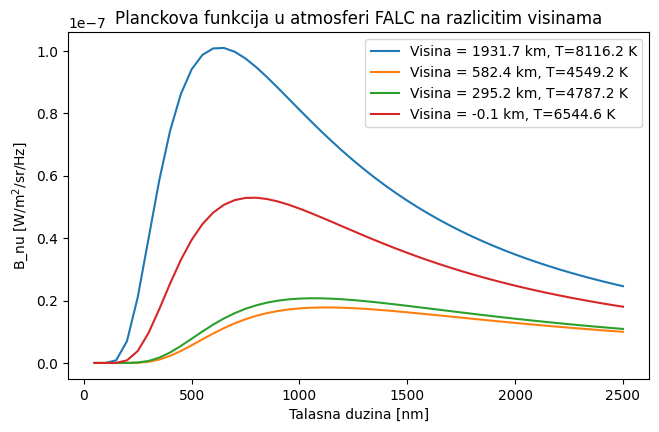

In [72]:
# Da proverimo da li ovo ima smisla, isplotujmo Plankovu funkciju za nekoliko visina u atmosferi:
plt.figure(figsize=(7.5,4.5))
for i in [0, 20, 40, 60]:
    plt.plot(llambda*1e9, B_nu_atmos[i,:], label=f'Visina = {z[i]/1e5:.1f} km, T={T[i]:.1f} K')
plt.xlabel('Talasna duzina [nm]')
plt.ylabel('B_nu [W/m$^2$/sr/Hz]')
plt.title('Planckova funkcija u atmosferi FALC na razlicitim visinama')
plt.legend()

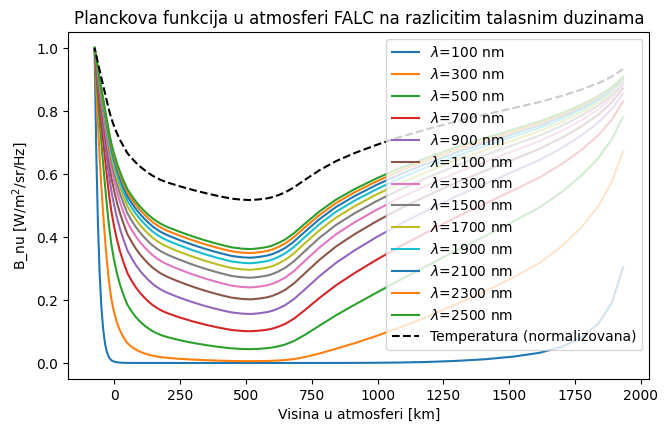

In [73]:
# Deluje da je ovo ok! Hajde da vidimo sada za razlicite talasne duzine, kako se menja plankova funckija, tj. funckija izvora sa dubinom!

plt.figure(figsize=(7.5,4.5))
for l in range(1,len(llambda),4):
    plt.plot(z/1e5, B_nu_atmos[:,l]/np.amax(B_nu_atmos[:,l]), label=f'$\\lambda$={llambda[l]*1e9:.0f} nm')

plt.plot(z/1e5, T/np.amax(T), 'k--', label='Temperatura (normalizovana)')
plt.xlabel('Visina u atmosferi [km]')
plt.ylabel('B_nu [W/m$^2$/sr/Hz]')
plt.title('Planckova funkcija u atmosferi FALC na razlicitim talasnim duzinama')
plt.legend()

# Obratiti paznju da smo svaki plot normalizovali na maksimalnu vrednost Plankove funkcije za tu talasnu duzinnu.

### 3) Ovde treba da numerički rešimo JPZ. Da bismo to uradili, tretiraćemo svaki sloj (sloj je definisan sa dve tačke na ivicama) kao sloj konačne optičke dubine i konstantne funkcije izvora. Za takav sloj znamo da: 

### $I^+ = I^0 e^{-\tau} + S(1-e^{-\tau})$

Pa onda rekurentno primenjujemo ovu relaciju iduci od dna ka vrhu atmosfere.

In [64]:
def resi_JPZ(tau, S):

    ND = len(tau)
    I = np.zeros(ND)  # inicijalizacija intenziteta

    # Donji granicni: 
    I[-1] = S[-1]  # intenzitet na dnu atmosfere je jednak izvoru na dnu atmosfere

    for d in range(ND-2, -1, -1):

        deltatau = tau[d+1] - tau[d]
        S_mean = 0.5 * (S[d+1] + S[d])
        I[d] = I[d+1] * np.exp(-deltatau) + S_mean * (1 - np.exp(-deltatau))

    return I
        

In [65]:
# Testirajmo ovo na funkciji izvora za lambda = 500 nm
l = 9  # indeks za lambda = 500 nm
S_lambda = B_nu_atmos[:,l]  # funkcija izvora za lambda = 500 nm
I_lambda = resi_JPZ(tau, S_lambda)
I_lambda.shape

(71,)

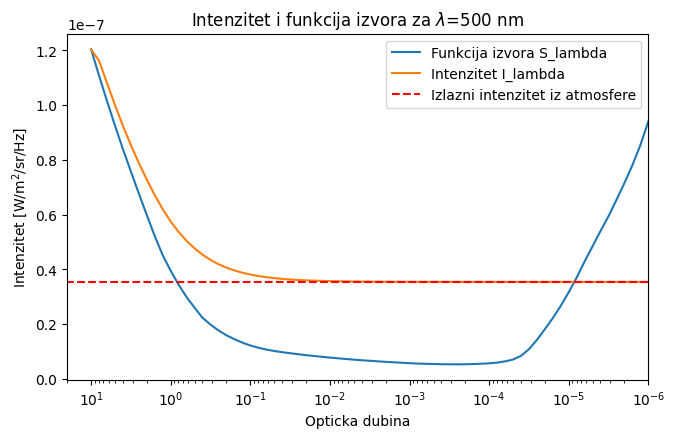

In [66]:
# Hajde da vidimo kako se ovaj intenzitet menja sa dubinom i da uporedimo to sa time kako se funkcija izvora menja sa dubinom. 
# Ovde cemo koristiti opticku dubinu kao x koordinatu:

plt.figure(figsize=(7.5,4.5))
plt.semilogx(tau, S_lambda, label='Funkcija izvora S_lambda')
plt.semilogx(tau, I_lambda, label='Intenzitet I_lambda')
plt.hlines(I_lambda[0], xmin=1e-6, xmax=20, colors='r', linestyles='dashed', label='Izlazni intenzitet iz atmosfere')
plt.xlabel('Opticka dubina')
plt.ylabel('Intenzitet [W/m$^2$/sr/Hz]')
plt.title('Intenzitet i funkcija izvora za $\\lambda$=500 nm')
plt.xlim([20,1e-6])
plt.legend()

In [67]:
# Hajde da uporedimo izlazni intenzitet sa funkcijom izvora na optickoj dubini 1.

print(I_lambda[0])
print(S_lambda[np.argmin(np.abs(tau - 1))])

3.543080403502858e-08
3.945629009047466e-08


In [94]:
# Sada racunamo izlazni spektar za sve talasne duzine, pri tome pretpostavljamo da je tau_lambda isto za sve.

NL = len(llambda)
spectrum_0 = np.zeros(NL)
for l in range(NL):
    S_lambda = B_nu_atmos[:,l]
    I_lambda = resi_JPZ(tau, S_lambda)
    spectrum_0[l] = I_lambda[0]  # izlazni intenzitet iz atmosfere za talasnu duzinu llambda[l]

Text(0.5, 1.0, 'Izlazni spektar iz atmosfere')

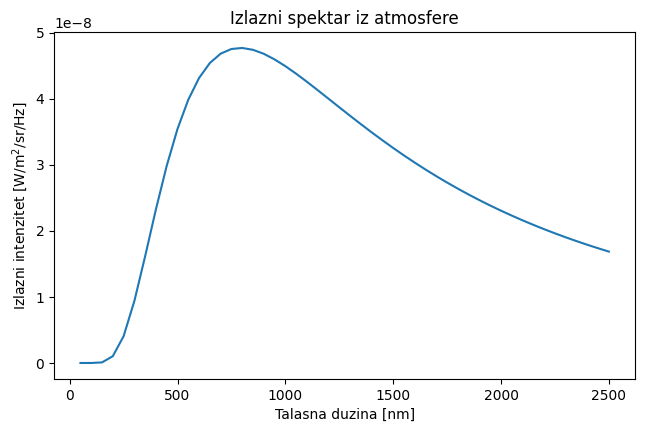

In [95]:
# Plotuj spektar:
plt.figure(figsize=(7.5,4.5))
plt.plot(llambda*1e9, spectrum_0)
plt.xlabel('Talasna duzina [nm]')
plt.ylabel('Izlazni intenzitet [W/m$^2$/sr/Hz]')
plt.title('Izlazni spektar iz atmosfere')

#### Ovde je sada jako važno prokomentarisati. Naime, dobili smo izlazni spektar koji je jednak Plankovoj funkciji. To je bilo neizbežno, jer smo koristili istu neprozračnost za svaku talasnu dužinu. Samim tim mi "vidimo" isti sloj na svakoj talasnoj dužini, te taj izlazni intenzitet, iako ima različitu brojčanu vrednost - odgovara istoj temperaturi. 

#### Da bismo dobili spektar koji nije ACT, moramo imati skalu optičkih dubina koja se menja sa talasnom dužinom. To ćemo sada uraditi ad-hoc, a na predmetu IAS se to detaljno radi iz početka. 

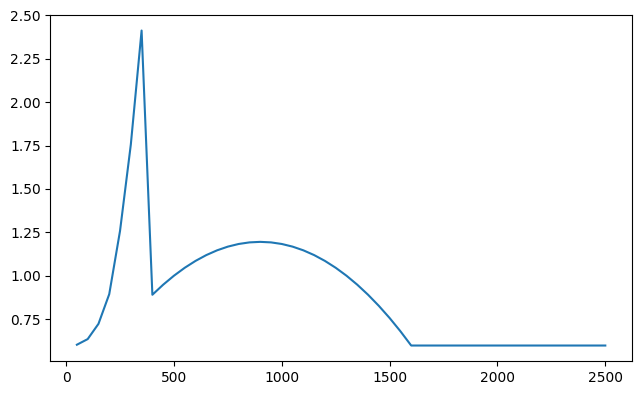

In [92]:
# Uvedimo bezdimenzionu promenljivu koja predstavlja odnos izmedju neprozracnosti na toj talasnoj duzini i referentne neprozracnosti 
# (tj. opticke dubine)

r_lambda = np.ones(NL)

# Prvo da pomnozimo ovo nekom parabolom koja podseca na H- neprozracnost
# Centrirana na 900 n, da padne na nulu na 1600 nm

r_Hminus = 1.0-(llambda - 900e-9)**2.0 / (1600e-9 - 900e-9)**2.0 
r_Hminus[np.where(r_Hminus < 0)] = 0.0

# Prvo pokusajmo da dodamo Balmerov skok na 364.5 nm

r_balmer = np.zeros(NL)
balmer_works = np.where( (llambda < 364.5e-9) )
r_balmer[balmer_works] = 3.0 * (llambda[balmer_works]/364.5E-9) ** 3.0

r_lambda = (r_lambda + r_Hminus + r_balmer)
r_lambda /= r_lambda[9]

# Testirajmo sta smo dobili:
plt.figure(figsize=(7.5,4.5))
plt.plot(llambda*1e9, r_lambda)

# Podsetnik da je ovo POTPUNO ad hoc, tj mi imitiramo ono sto bi se dobilo detaljnim racunanjem koje smo poceli na proslom casu.



In [96]:
# Sada racunamo izlazni spektar za sve talasne duzine, pri tome pretpostavljamo da je tau_lambda isto za sve.

NL = len(llambda)
spectrum = np.zeros(NL)
for l in range(NL):
    S_lambda = B_nu_atmos[:,l]
    I_lambda = resi_JPZ(tau*r_lambda[l], S_lambda)
    spectrum[l] = I_lambda[0]  # izlazni intenzitet iz atmosfere za talasnu duzinu llambda[l]

Text(0.5, 1.0, 'Izlazni spektar iz atmosfere')

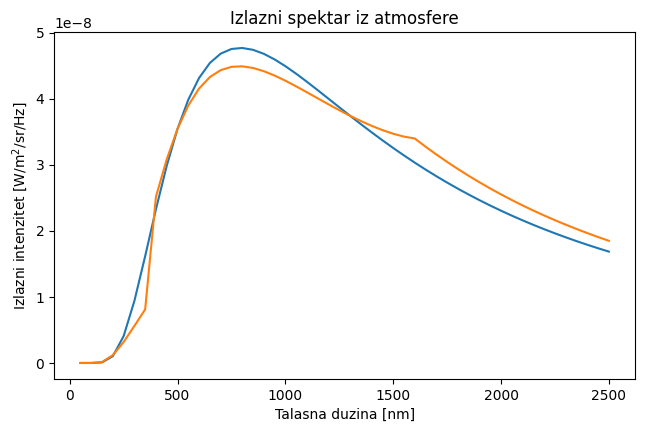

In [97]:
# Plotuj spektar:
plt.figure(figsize=(7.5,4.5))
plt.plot(llambda*1e9, spectrum_0, label='Konstanta neprozracnost')
plt.plot(llambda*1e9, spectrum, label='Neprozracnost zavisi od $\\lambda$')
plt.xlabel('Talasna duzina [nm]')
plt.ylabel('Izlazni intenzitet [W/m$^2$/sr/Hz]')
plt.title('Izlazni spektar iz atmosfere')

#### Ovo sada vise NIJE apsolutno crno telo.

#### 3.3 Konačni korak je da proverimo kako ovo radi za različite $\mu$.

In [98]:
# Definisimo grid za mi
mu = np.linspace(0.1,1,10)

In [ ]:
# Sada ponovo resavamo JPZ za jednu talasnu duzinu, recimo 500 nm, ali sada za sve uglove mu
l = 9  # indeks za lambda = 500 nm
S_lambda = B_nu_atmos[:,l]  # funkcija izvora za lambda
I_mu = np.zeros(len(mu))
for m in range(len(mu)):
    I_lambda = resi_JPZ(tau/mu[m], S_lambda)
    I_mu = I_lambda[0]